In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/kickstarter_projects.csv')

In [4]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [ ]:
df.tail()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live
374852,1339173863,Spirits of the Forest,Games,Tabletop Games,Spain,2018-01-02 15:02:31,2018-01-26,24274,4483,82,Live


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [ ]:
df.State.value_counts()


State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [5]:
df[df.State.isin(["Failed","Successful"])]

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374310,749399445,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,Successful
374400,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,Successful
374458,1411606124,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,Successful
374530,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,Successful


In [6]:
df["Launched"] = pd.to_datetime(df["Launched"])
df["Deadline"] = pd.to_datetime(df["Deadline"])


In [ ]:
df["Deadline"]

0        2009-05-31
1        2009-07-20
2        2009-05-03
3        2009-07-14
4        2009-05-26
            ...    
374848   2018-01-16
374849   2018-02-09
374850   2018-01-16
374851   2018-02-01
374852   2018-01-26
Name: Deadline, Length: 374853, dtype: datetime64[ns]

In [ ]:
df["Launched"]

0        2009-04-21 21:02:48
1        2009-04-23 00:07:53
2        2009-04-24 21:52:03
3        2009-04-25 17:36:21
4        2009-04-27 14:10:39
                 ...        
374848   2018-01-02 14:13:09
374849   2018-01-02 14:15:38
374850   2018-01-02 14:17:46
374851   2018-01-02 14:38:17
374852   2018-01-02 15:02:31
Name: Launched, Length: 374853, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


In [7]:
df["lon_launched"] = df["Launched"].dt.date
df["time_launched"] = df["Launched"].dt.time
df["day_launched"] = df["Launched"].dt.weekday

In [ ]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,lon_launched,time_launched,day_launched
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,2009-04-21,21:02:48,1
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,2009-04-23,00:07:53,3
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,2009-04-24,21:52:03,4
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,2009-04-25,17:36:21,5
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,2009-04-27,14:10:39,0


In [8]:
df["duration"] = (df["Deadline"] - df["Launched"]).dt.days

In [ ]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,lon_launched,time_launched,day_launched,duration
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,2009-04-21,21:02:48,1,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,2009-04-23,00:07:53,3,87
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,2009-04-24,21:52:03,4,8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,2009-04-25,17:36:21,5,79
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,2009-04-27,14:10:39,0,28


In [ ]:
df["State"].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

In [ ]:
df["duration"].unique()

array([39, 87,  8, 79, 28, 17, 29, 32, 16, 48, 61, 65, 46, 36, 19, 35, 75,
       30, 34, 60, 89, 27, 26, 31, 25, 22, 55, 23, 52, 83, 49, 80, 62,  9,
       72, 88, 47, 59, 58, 84, 74, 41, 71, 51, 69, 73, 15, 21, 40, 43, 42,
       57, 38, 37, 86,  3, 20, 13, 10, 24, 66, 85, 64, 78, 54, 63,  5, 45,
       50, 44, 70, 81, 76,  7,  2,  4,  6, 68, 67, 33, 56, 53, 82, 77, 12,
       18, 14,  1,  0, 11, 90, 91])

In [9]:
df_filter = df[df.State.isin(["Failed","Successful"])]
df_filter.replace({"Failed":0, "Successful":1}, inplace=True)            



In [ ]:
df_filter.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,lon_launched,time_launched,day_launched,duration
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,2009-04-21,21:02:48,1,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,2009-04-23,00:07:53,3,87
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,1,2009-04-24,21:52:03,4,8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,1,2009-04-25,17:36:21,5,79
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,2009-04-27,14:10:39,0,28


In [ ]:
df_filter.tail()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,lon_launched,time_launched,day_launched,duration
374310,749399445,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,1,2017-12-23,10:14:21,5,2
374400,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,1,2017-12-26,13:00:24,1,4
374458,1411606124,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,1,2017-12-27,03:52:38,2,3
374530,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,1,2017-12-28,01:48:58,3,1
374605,801423615,Collaboration with Snoop Dogg,Music,Hip-Hop,Australia,2017-12-29 03:22:32,2018-01-01,392,514,6,1,2017-12-29,03:22:32,4,2


In [10]:
df_filter= df_filter.query("duration <= 60 ")





In [ ]:
df_filter.Launched.dt.year.value_counts()

Launched
2015    65266
2014    59303
2016    49092
2017    43419
2013    41084
2012    38478
2011    22465
2010     7597
2009      622
Name: count, dtype: int64

In [ ]:
df_filter.Subcategory.unique()

array(['Fashion', 'Illustration', 'Journalism', 'Shorts', 'Fiction',
       'Rock', 'Photography', 'Software', 'Film & Video', 'Documentary',
       'Theater', 'Sculpture', 'Electronic Music', 'Nonfiction',
       'Painting', 'Publishing', 'Public Art', 'Art', 'Crafts', 'Music',
       'Narrative Film', "Children's Books", 'Tabletop Games',
       'Indie Rock', 'Digital Art', 'Animation', 'Comics', 'Video Games',
       'Country & Folk', 'Periodicals', 'Food', 'Webseries',
       'Conceptual Art', 'Graphic Design', 'Hip-Hop', 'Performance Art',
       'Pop', 'World Music', 'Knitting', 'Technology', 'Classical Music',
       'Jazz', 'Hardware', 'Graphic Novels', 'Translations',
       'Product Design', 'Art Books', 'Puzzles', 'Games', 'Dance',
       'Poetry', 'Design', 'Radio & Podcasts', 'Space Exploration',
       'Photobooks', 'Audio', 'R&B', 'Fabrication Tools', 'Textiles',
       'Mixed Media', 'Architecture', 'Immersive', 'Musical',
       'Literary Journals', 'Video', 'Apps', 'D

In [ ]:
df_filter.drop(["ID"], axis=1, inplace=True)

In [ ]:
df_filter.tail()

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,lon_launched,time_launched,day_launched,duration
374310,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,1,2017-12-23,10:14:21,5,2
374400,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,1,2017-12-26,13:00:24,1,4
374458,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,1,2017-12-27,03:52:38,2,3
374530,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,1,2017-12-28,01:48:58,3,1
374605,Collaboration with Snoop Dogg,Music,Hip-Hop,Australia,2017-12-29 03:22:32,2018-01-01,392,514,6,1,2017-12-29,03:22:32,4,2


<Axes: xlabel='count', ylabel='Country'>

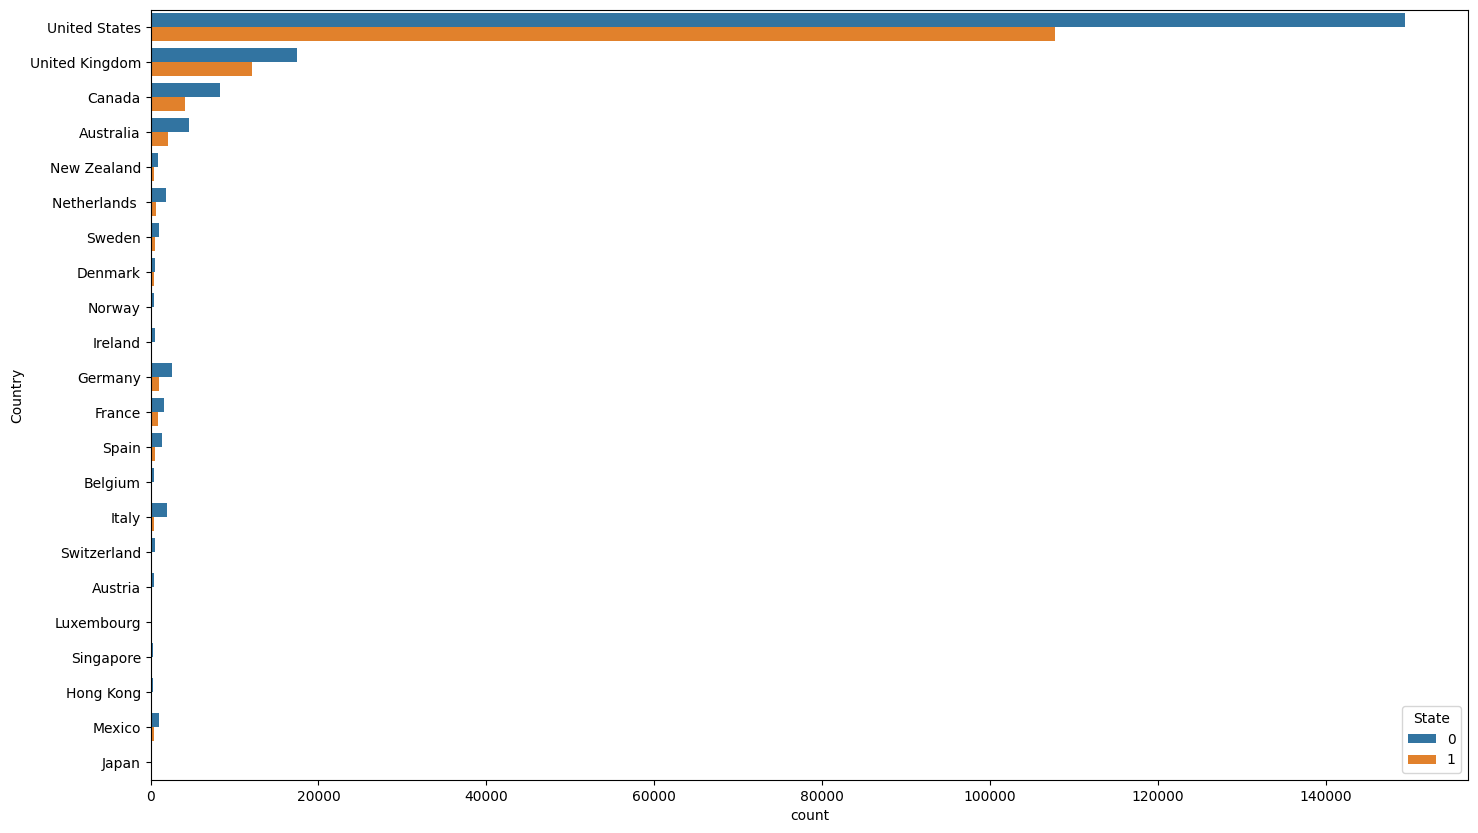

In [ ]:
plt.figure(figsize=(17,10))
sns.countplot(y= df_filter.Country , hue=df_filter.State)


In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327326 entries, 0 to 374605
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Name           327326 non-null  object        
 1   Category       327326 non-null  object        
 2   Subcategory    327326 non-null  object        
 3   Country        327326 non-null  object        
 4   Launched       327326 non-null  datetime64[ns]
 5   Deadline       327326 non-null  datetime64[ns]
 6   Goal           327326 non-null  int64         
 7   Pledged        327326 non-null  int64         
 8   Backers        327326 non-null  int64         
 9   State          327326 non-null  int64         
 10  lon_launched   327326 non-null  object        
 11  time_launched  327326 non-null  object        
 12  day_launched   327326 non-null  int32         
 13  duration       327326 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(5), object(6)
memor

<Axes: xlabel='duration', ylabel='Count'>

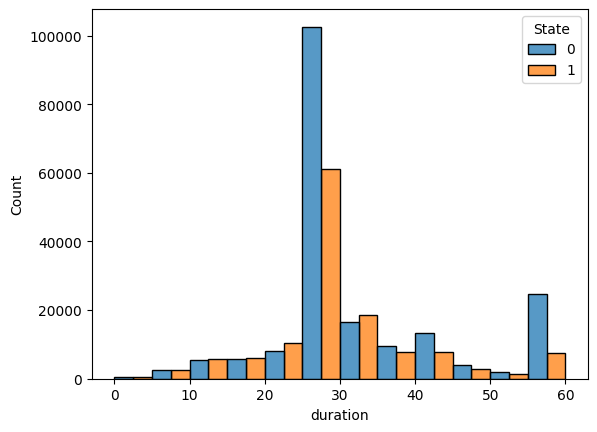

In [ ]:
#plt.figure(figsize=(17,10))
sns.histplot(data= df_filter, x="duration", hue="State", multiple="dodge", bins = 12)


<Axes: xlabel='Category', ylabel='count'>

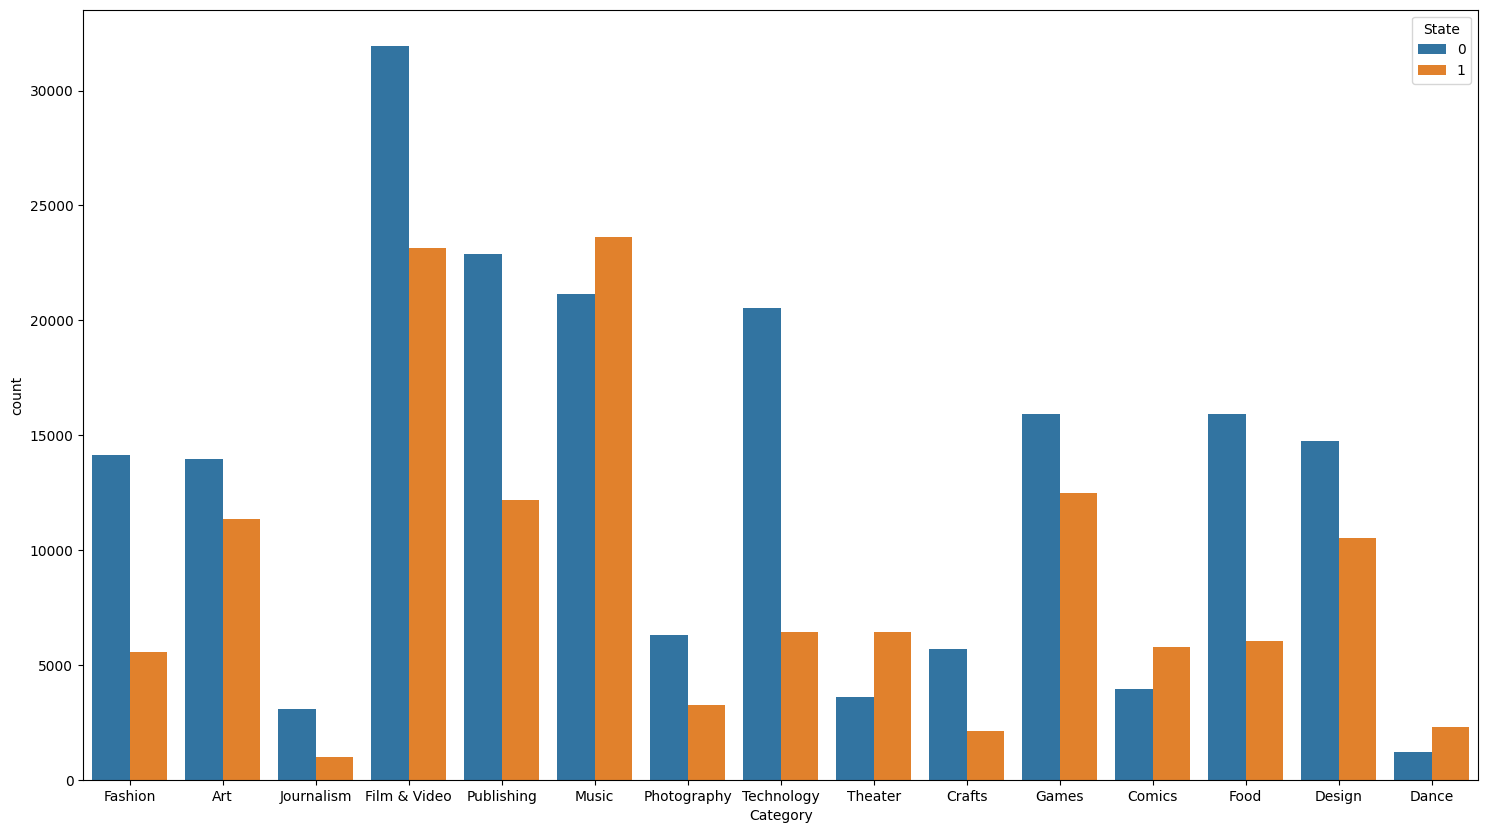

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x= df_filter.Category , hue=df_filter.State)

<Axes: xlabel='Goal', ylabel='Count'>

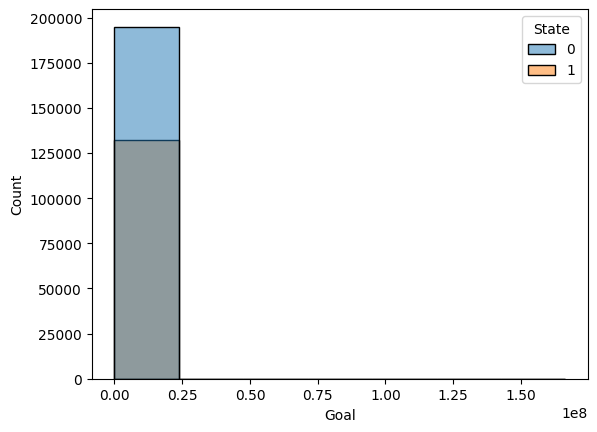

In [ ]:
sns.histplot(x= df_filter.Goal , hue=df_filter.State, bins=7 ) 


<Axes: xlabel='Goal', ylabel='Count'>

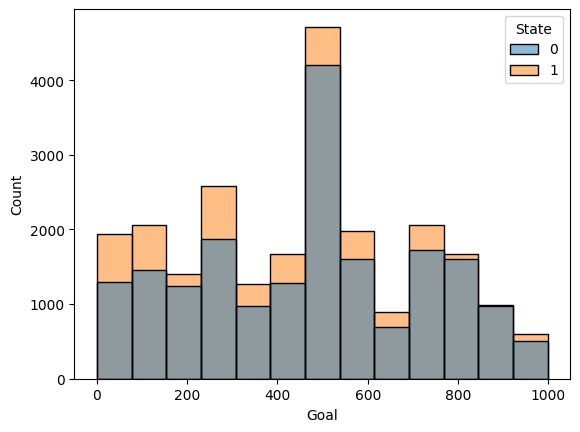

In [ ]:
sns.histplot(data= df_filter[df_filter["Goal"]< 1000], x="Goal" , hue="State", bins=13 ) 


In [ ]:
df_filter.describe()

,Launched,Deadline,Goal,Pledged,Backers,State,day_launched,duration
count,327326,327326,3.273260e+05,3.273260e+05,327326.000000,327326.000000,327326.000000,327326.000000
mean,2014-09-20 14:59:20.961185280,2014-10-23 09:50:55.236675072,4.168288e+04,1.002358e+04,117.413346,0.404080,2.418470,32.352040
min,2009-04-21 21:02:48,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2013-04-24 03:18:34.750000128,2013-05-26 00:00:00,2.000000e+03,5.000000e+01,2.000000,0.000000,1.000000,29.000000
50%,2014-11-17 07:33:41,2014-12-19 00:00:00,5.000000e+03,7.890000e+02,15.000000,0.000000,2.000000,29.000000
75%,2016-03-12 00:11:35,2016-04-15 00:00:00,1.500000e+04,4.635000e+03,63.000000,1.000000,4.000000,34.000000
max,2017-12-29 03:22:32,2018-01-02 00:00:00,1.663614e+08,2.033899e+07,219382.000000,1.000000,6.000000,60.000000
std,NaN,NaN,1.114360e+06,9.724465e+04,971.680293,0.490714,1.761395,11.536325


In [ ]:
df_filter[['State', 'Goal', 'duration']].corr()

,State,Goal,duration
State,1.000000,-0.023722,-0.126259
Goal,-0.023722,1.000000,0.024495
duration,-0.126259,0.024495,1.000000


goal billow 1000 is sucss and above is a failed
 

# Creating a baseline model

In [17]:
# Deciding on categories 
# which 3 categories are most likely to succeed?
df_filter.groupby('Category').State.mean().sort_values()
#df_filter.Category.nunique()

Category
Technology      0.237885
Journalism      0.241860
Crafts          0.270419
Food            0.275484
Fashion         0.283134
Photography     0.340090
Publishing      0.347689
Design          0.416248
Film & Video    0.420426
Games           0.439187
Art             0.448839
Music           0.527511
Comics          0.593990
Theater         0.641687
Dance           0.655603
Name: State, dtype: float64

In [ ]:
# check value counts for most successful categories

df_filter.Category.value_counts()

Category
Film & Video    55087
Music           44782
Publishing      35086
Games           28423
Technology      26971
Art             25332
Design          25283
Food            21965
Fashion         19708
Theater         10008
Comics           9751
Photography      9521
Crafts           7799
Journalism       4085
Dance            3525
Name: count, dtype: int64

Go with the 3 most frequent categories: Film & Video, Music, Publishing

### Metric
Recall, as to avoid false negatives

### Baseline Model

In [27]:
#create data frames for categories
df_film = df_filter[df_filter.Category.isin(["Film & Video"])]
df_music = df_filter[df_filter.Category.isin(["Music"])]
df_publishing = df_filter[df_filter.Category.isin(["Publishing"])]

<Axes: xlabel='duration', ylabel='Count'>

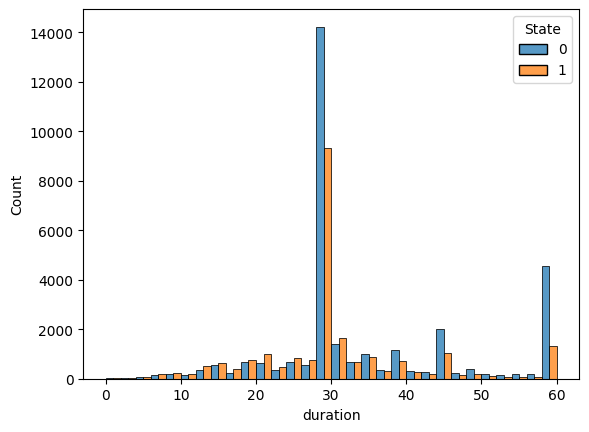

In [ ]:
# plot data
sns.histplot(data=df_film,x='duration', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

<Axes: xlabel='duration', ylabel='Count'>

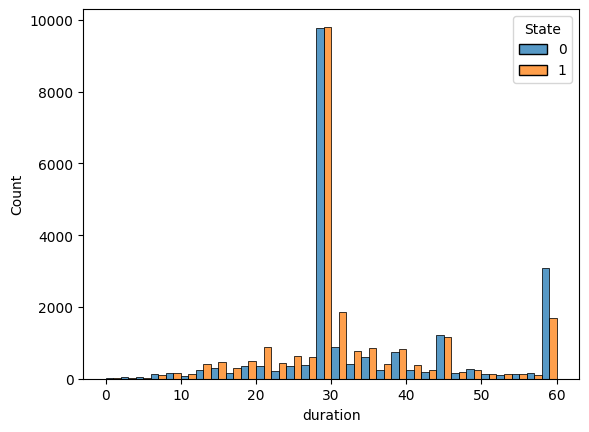

In [34]:
# plot data
sns.histplot(data=df_music,x='duration', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

<Axes: xlabel='duration', ylabel='Count'>

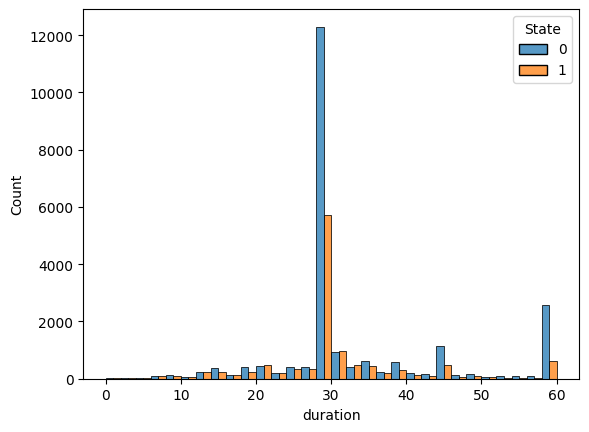

In [35]:
# plot data
sns.histplot(data=df_publishing,x='duration', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

Set Cutoff for baseline model to 29 for all three models

## Splitting data for testing 

In [ ]:
#define X and y
X = df_film.drop(columns='State')
Y = df_film.State

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [45]:
y_baseline = X_test.duration.apply(lambda x:0 if x  > 29 else 1).values


In [49]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_baseline, average='binary')  # Adjust 'average' as needed
print(f"Recall: {recall}")

Recall: 0.648607150690941


In [50]:
Xm = df_music.drop(columns='State')
Ym = df_music.State
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(Xm, Ym, test_size=0.20, random_state=42)
y_baseline_m = X_test_m.duration.apply(lambda x:0 if x  > 29 else 1).values
recall_m = recall_score(y_test_m, y_baseline_m, average='binary')  # Adjust 'average' as needed
print(f"Recall: {recall_m}")

Recall: 0.6095338983050848


In [51]:
Xp = df_publishing.drop(columns='State')
Yp = df_publishing.State
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(Xp, Yp, test_size=0.20, random_state=42)
y_baseline_p = X_test_p.duration.apply(lambda x:0 if x  > 29 else 1).values
recall_p = recall_score(y_test_p, y_baseline_p, average='binary')  # Adjust 'average' as needed
print(f"Recall: {recall_p}")

Recall: 0.6603697749196141


In [ ]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [ ]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

altitude low meters mean is 1500.3684210526317
altitude_high_meters_mean is 1505.6315789473683
altitude_mean_log_mean is 7.0571530664031155


## Trainining the model

In [ ]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

6.701014816713759e-28


In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

2.08680004794465e-27
